<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_20_%EA%B0%9C%2C_%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%82%AC%EC%A7%84_%EC%98%88%EC%B8%A1_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- NPZ 파일 로딩

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/빅데이터4차(딥러닝)/data/cats_and_dogs.npz')
data

In [34]:
len(data)
# X_train, X_test, y_train, y_test 총 4가지로 구성되어 있음

4

In [35]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 224, 224, 3)
(1000, 224, 224, 3)
(2000,)
(1000,)


### CNN 신경망 모델링

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [45]:
# 신경망 구조 설계
cat_dog_model = Sequential()

# 1. 특성추출부(Conv - 특징이 되는 부분의 정보를 부각시킴)
# Conv2D : 2D 이미지 데이터에 대해 사용
# MaxPooling2D : 2D 이미지 데이터에 대해 필요없는 부분을 삭제
cat_dog_model.add(Conv2D(input_shape=(224,224,3),
                         # 필터의 개수 -> 추출하는 특징의 개수를 설정
                         filters=64,
                         # 필터(커널)의 크기를 설정
                         kernel_size = (5,5),
                         # same : 원본 데이터의 크기에 맞게 알아서 패딩을 적용(valid : 패딩 적용 X)
                         padding = 'same',
                         # 필터로 합성곱 연산시 건너뛰는 크기를 지정(행,열), 일반적으로 필터 사이즈보다 작게 설정
                         strides = (3,3),
                         activation = 'relu'                         
                         ))

cat_dog_model.add(Conv2D(filters=64,
                         kernel_size = (3,3),
                         padding = 'same',
                         activation = 'relu'
                         ))

cat_dog_model.add(Dropout(0.25))

# 2. 특성추출부(Pooling - 불필요한 부분을 삭제)
# Pool_size : 풀링층 필터의 크기
cat_dog_model.add(MaxPool2D(pool_size=2,
                               strides = (2,2)
                               ))

# MLP 층에 넣어주기
cat_dog_model.add(Flatten()) # input_shape 사용하지 않아도 됨, 자동으로 전체 길이만큼 펴줌
cat_dog_model.add(Dense(300, activation='relu'))
cat_dog_model.add(Dense(150, activation='relu'))
cat_dog_model.add(Dense(50, activation='relu'))
cat_dog_model.add(Dense(1, activation='sigmoid'))

cat_dog_model.summary()

 # CNN층에서의 파라미터수는 필터크기 * 필터수 * 채널수 + 필터수

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 75, 75, 64)        4864      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               26285100  
_________________________________________________________________
dense_13 (Dense)             (None, 150)              

In [46]:
# 학습/평가 방법 설정
cat_dog_model.compile(loss = 'binary_crossentropy',
                      optimizer=Adam(lr=0.00005),
                      metrics = ['acc']
                      )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [47]:
save_path = '/content/drive/MyDrive/Colab Notebooks/빅데이터4차(딥러닝)/model/Cats_Dogs_Model_{epoch:03d}_{val_acc:4f}.hdf5'

f_mckp = ModelCheckpoint(filepath = save_path,
                         monitor = '',
                         save_best_only = True,
                         mode = 'max',
                         verbose = 1
                         )

f_early = EarlyStopping(monitor='val_acc',
                        patience = 5
                                       )

In [48]:
h1 = cat_dog_model.fit(X_train, y_train,
                      validation_split = 0.2,
                      epochs = 50,
                      batch_size = 128,
                      callbacks = [f_mckp, f_early]
                                   )

Epoch 1/50
13/13 [==============================] - 1s 66ms/step - loss: 0.6700 - acc: 0.5994 - val_loss: 0.9230 - val_acc: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 1s 60ms/step - loss: 0.6539 - acc: 0.6250 - val_loss: 0.8575 - val_acc: 0.0025
Epoch 3/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6376 - acc: 0.6388 - val_loss: 0.9962 - val_acc: 0.0175
Epoch 4/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6289 - acc: 0.6544 - val_loss: 0.7191 - val_acc: 0.4600
Epoch 5/50
13/13 [==============================] - 1s 55ms/step - loss: 0.6066 - acc: 0.6900 - val_loss: 0.8903 - val_acc: 0.1900
Epoch 6/50
13/13 [==============================] - 1s 55ms/step - loss: 0.5909 - acc: 0.6994 - val_loss: 0.6991 - val_acc: 0.5375
Epoch 7/50
13/13 [==============================] - 1s 56ms/step - loss: 0.5665 - acc: 0.7169 - val_loss: 0.6654 - val_acc: 0.6050
Epoch 8/50
13/13 [==============================] - 1s 56ms/step - loss: 0.5487

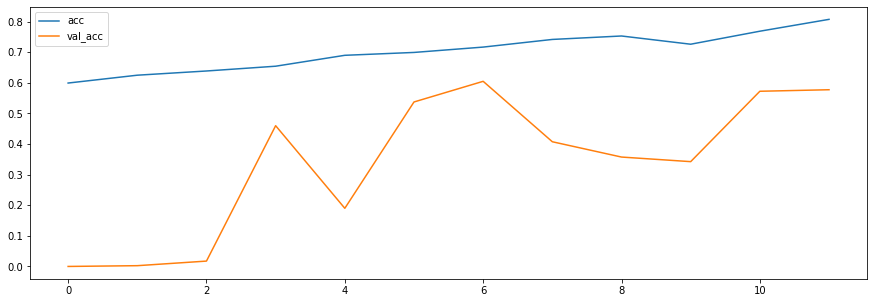

In [50]:
plt.figure(figsize=(15,5))

plt.plot(h1.history['acc'],
         label = 'acc'
         )

plt.plot(h1.history['val_acc'],
         label = 'val_acc'
         )

plt.legend()
plt.show()

- 개, 고양이 사진의 다양함과 데이터의 규모에 비해서 conv층과 Pooling층이 너무 간단해서 제대로 된 결과가 나오지 않음

### VGG16 모델을 개, 고양이 이미지 데이터 분류에 활용해보자!

In [61]:
from tensorflow.keras.applications import VGG16

In [62]:
vgg16 = VGG16(include_top=False,
              weights = 'imagenet',
              input_shape = (224,224,3)
              )

# include_top = False : 불러온 모델의 MLP층을 사용하지 않음 (특성추출방식)
# -> 기존 이미지넷 대회에서는 1000가지 이미지를 분류했으나 우리는 개, 고양이로만 분류할 것이기 때문에 MLP층을 다르게 설정해줘야 함
# weights = 'imagenet' : 이미지넷에서 학습된 가중치(w)를 그대로 가져옴

In [63]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [64]:
# 신경망 설계
transfer_model = Sequential()

transfer_model.add(vgg16)

# 미세조정방식 적용
# VGG16 모델에서 마지막 conv층을 학습이 가능하도록 설정해보자!
# 마지막 층을 제외한 나머지는 모두 동결시켜서 기존 학습된 w,b값을 보존하자!
# --------------------------------------------
for layer in vgg16.layers:
  # block5_conv3 층만 학습이 가능하도록 설정
  if layer .name == 'block5_conv3':
    layer.trainable = True
  # 나머지 층들은 학습이 불가능하도록 동결
  else:
    layer.trainable = False
# --------------------------------------------

transfer_model.add(Flatten())
transfer_model.add(Dense(300, activation='relu'))
transfer_model.add(Dense(150, activation='relu'))
transfer_model.add(Dense(50, activation='relu'))
transfer_model.add(Dense(1, activation='sigmoid'))

transfer_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               7526700   
_________________________________________________________________
dense_25 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_26 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 22,294,139
Trainable params: 9,939,259
Non-trainable params: 12,354,880
__________________________________

In [65]:
# 학습/평가 방법 설정
transfer_model.compile(loss = 'binary_crossentropy',
                      optimizer=Adam(lr=0.0005),
                      metrics = ['acc']
                      )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [66]:
h2 = transfer_model.fit(X_train, y_train,
                      validation_split = 0.2,
                      epochs = 30,
                      batch_size = 128
                                   )

Epoch 1/30
13/13 [==============================] - 4s 205ms/step - loss: 0.5666 - acc: 0.7088 - val_loss: 0.1667 - val_acc: 0.9400
Epoch 2/30
13/13 [==============================] - 2s 190ms/step - loss: 0.1673 - acc: 0.9362 - val_loss: 0.1864 - val_acc: 0.9250
Epoch 3/30
13/13 [==============================] - 2s 191ms/step - loss: 0.0717 - acc: 0.9769 - val_loss: 0.4087 - val_acc: 0.8525
Epoch 4/30
13/13 [==============================] - 2s 191ms/step - loss: 0.0271 - acc: 0.9931 - val_loss: 0.3455 - val_acc: 0.8775
Epoch 5/30
13/13 [==============================] - 2s 190ms/step - loss: 0.0066 - acc: 0.9987 - val_loss: 0.1609 - val_acc: 0.9400
Epoch 6/30
13/13 [==============================] - 2s 191ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.2090 - val_acc: 0.9350
Epoch 7/30
13/13 [==============================] - 2s 192ms/step - loss: 5.3513e-04 - acc: 1.0000 - val_loss: 0.3020 - val_acc: 0.9150
Epoch 8/30
13/13 [==============================] - 2s 191ms/step - loss

In [56]:
# 동결시킬 층들을 확인하기 위해 vgg16 모델의 layer(층) 명 들을 확인
for layer in vgg16.layers:
  print (layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


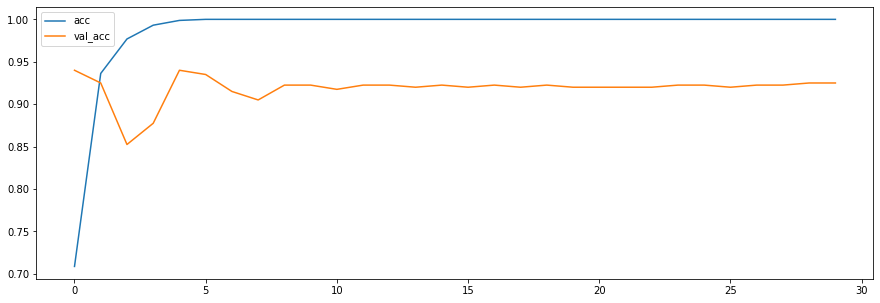

In [67]:
plt.figure(figsize=(15,5))

plt.plot(h2.history['acc'],
         label = 'acc'
         )

plt.plot(h2.history['val_acc'],
         label = 'val_acc'
         )

plt.legend()
plt.show()

In [68]:
transfer_model.evaluate(X_test, y_test)

32/32 [==============================] - 4s 59ms/step - loss: 0.3222 - acc: 0.9340


[0.32218673825263977, 0.9340000152587891]

- 처음 MLP만 바꿔줬을 때 (특성추출방식)는 학습이 제대로 되지 않는 것을 확인
- -> MLP층에서 발생된 오차가 역전파를 통해서 VGG16 Conv층으로 전달되면서 사전에 학습되어 있던 w,b값을 매우 손상시켰음
- 사전에 잘 학습된 w,b값이 변경되지 않도록 VGG16모델의 일부층들을 동결시켜놓고 추가로 학습
- -> 제대로 동작하는 것을 확인